***

<font size="5" color='blue'>**Project 3 - Ensemble Techniques**</font>

___

<span style='font-size: 15pt' > <ins>**Goal**</ins>
 </span>

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

<font size="4">**Steps and Tasks**</font>

**Import libraries**

In [1]:
# Import libraries

import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
from warnings import simplefilter    # import warnings filter
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Visualization libraries
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
import missingno as msno
from yellowbrick.classifier import ClassificationReport, ROCAUC, confusion_matrix

# Display libraries
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format

<span style='background :yellow; font-size: 15pt'> **1.** Deliverable – 1 (Exploratory data quality report reflecting the following) – **(20)**
 </span>

1. Univariate analysis **(12 marks)**
    * a. Univariate analysis - data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
    * b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    * c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

**<ins>Attribute information</ins>**

***Input variables:***

Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

***Output variable (desired target):***
17. **Target: Tell us has the client subscribed a term deposit. (Yes, No)**

**Visualize top of the data**

In [2]:
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Check data information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Statistical summary**

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


**shape**

In [5]:
data.shape

(45211, 17)

**Find null values**

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

**Find unique values**

In [7]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
# import pandas_profiling
# data.profile_report()

**Visualize categorical variables**

In [9]:
categories = data.select_dtypes(include=['object'])
categories

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


**Count calues for each categorical variable and target**

In [10]:
print('Job')
print('------------------------')
print(data['job'].value_counts())
print()
print('Marital status')
print('------------------------')
print(data['marital'].value_counts())
print()
print('Education level')
print('------------------------')
print(data['education'].value_counts())
print()
print('Has credit in default?')
print('------------------------')
print(data['default'].value_counts())
print()
print('Has housing loan?')
print('------------------------')
print(data['housing'].value_counts())
print()
print('Has personal loan?')
print('------------------------')
print(data['loan'].value_counts())
print()
print('Contact communication type')
print('------------------------')
print(data['contact'].value_counts())
print()
print('Last contact month of year')
print('------------------------')
print(data['month'].value_counts())
print()
print('Outcome of the previous marketing campaign')
print('------------------------')
print(data['poutcome'].value_counts())
print()
print('Target: client subscribed a term deposit?')
print('------------------------')
print(data['Target'].value_counts())
print()

Job
------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Marital status
------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Education level
------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Has credit in default?
------------------------
no     44396
yes      815
Name: default, dtype: int64

Has housing loan?
------------------------
yes    25130
no     20081
Name: housing, dtype: int64

Has personal loan?
------------------------
no     37967
yes     7244
Name: loan, dtype: int64

Contact communication type
------------------------
cellular     29285
unknown      13020
telephone     2906
Name:

/Users/gastonalvarado/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/gastonalvarado/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


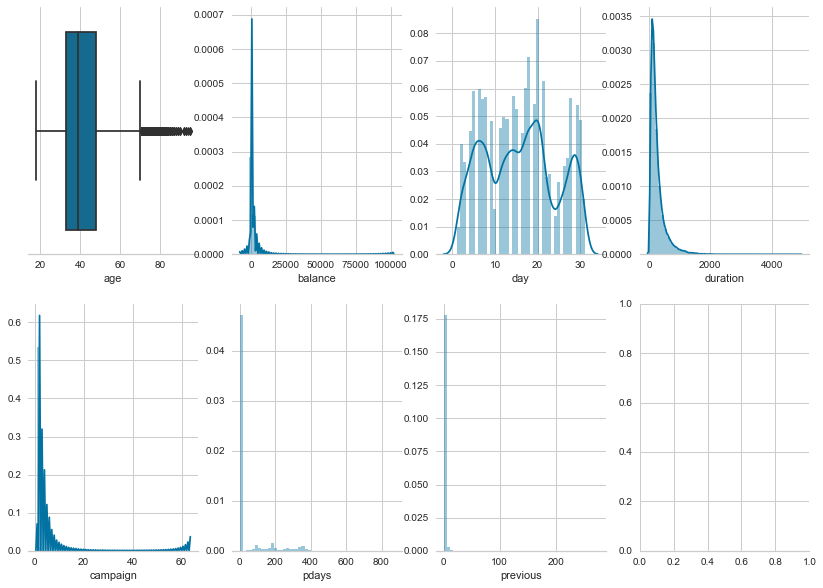

In [22]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,4, figsize=(14, 10))
sns.despine(left=True)

# Plot histogram and plot box for each variable that is relevant
sns.boxplot(data['age'],ax=axes[0,0]);
sns.distplot(data['balance'],ax=axes[0,1]);
sns.distplot(data['day'],ax=axes[0,2]);
sns.distplot(data['duration'],ax=axes[0,3]);
sns.distplot(data['campaign'],ax=axes[1,0]);
sns.distplot(data['pdays'],ax=axes[1,1]);
sns.distplot(data['previous'],ax=axes[1,2]);

2. Multivariate analysis **(8 marks)**
    * a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
    * b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

/Users/gastonalvarado/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/gastonalvarado/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


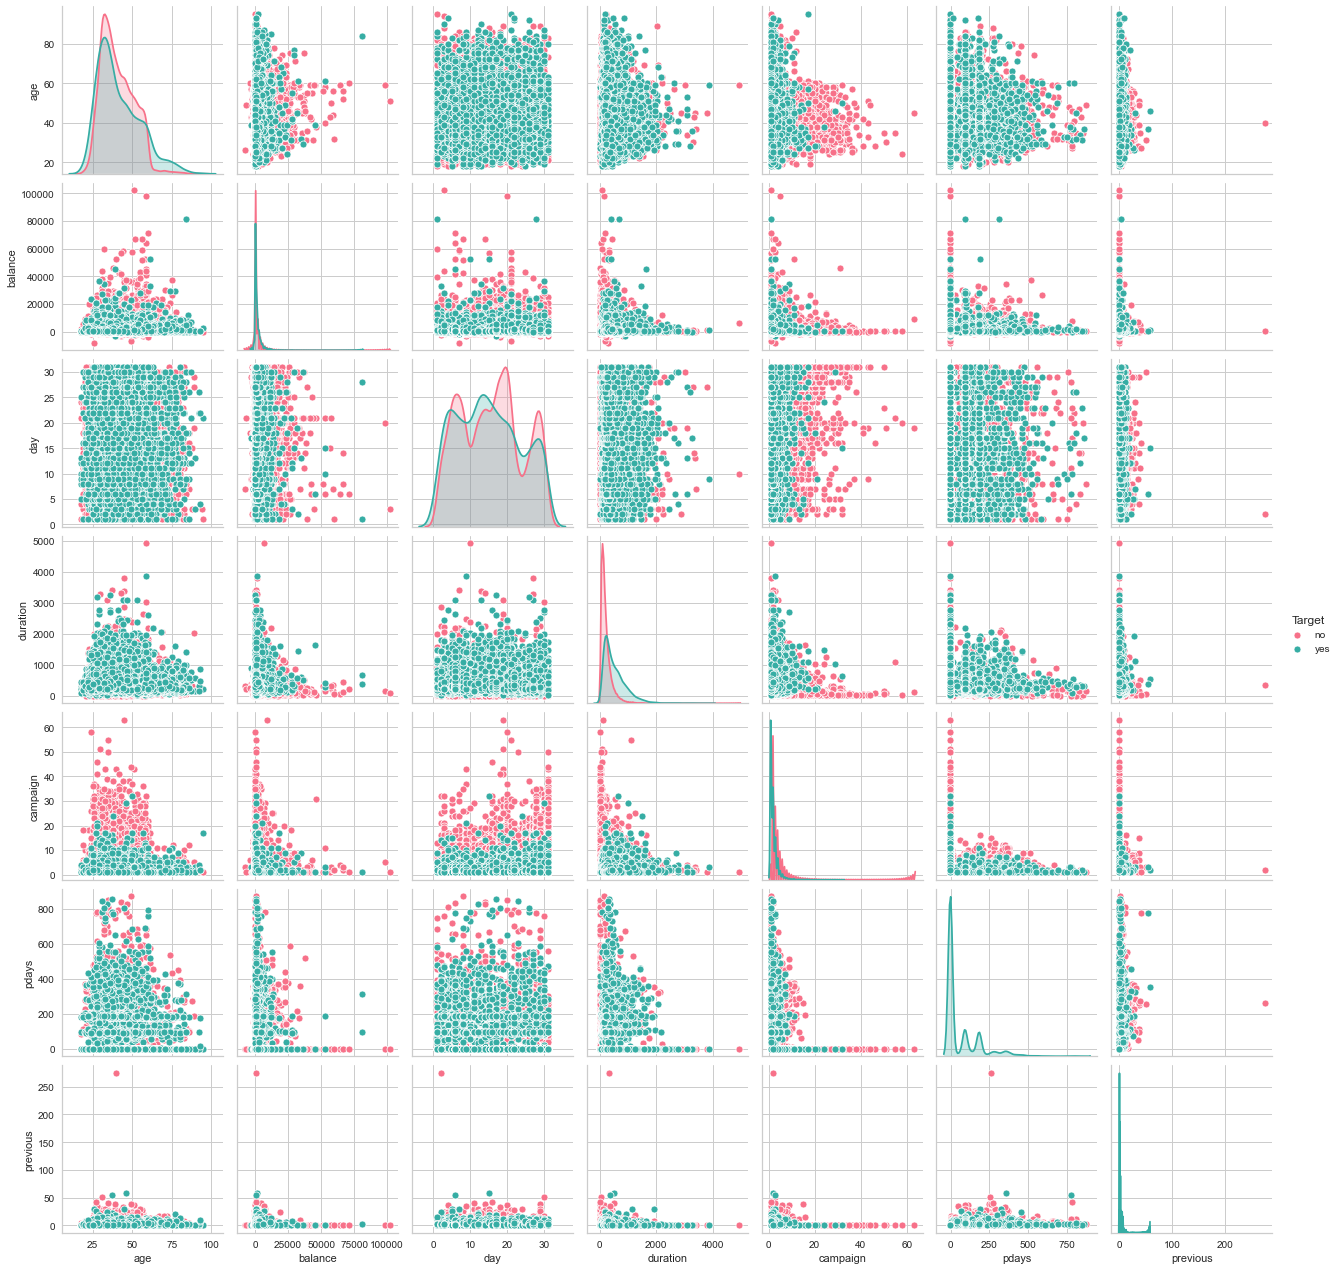

In [21]:
sns.pairplot(data,diag_kind='kde', hue="Target", palette="husl");

<span style='background :yellow; font-size: 15pt'> **2.** Deliverable – 2 (Prepare the data for analytics) – **(10)**
 </span>

1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

<span style='background :yellow; font-size: 15pt'> **3.** Deliverable – 3 (create the ensemble model) – **(30)**

 </span>

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. **(10 marks)**
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) **(15 marks)**
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. **(5 marks)**

We use the mean of the experience column to replace all the negative values

In [ ]:
data['Experience'] = data['Experience'].replace([-1,-2,-3],20.10)

We can see now that "Experience" does not have any negative values

In [ ]:
data.describe().transpose().style.apply(lambda x: ['background: lightgreen' if x.name in ['Experience'] 
                              else '' for i in x], axis=1)

<span style='background :yellow; font-size: 15pt'> **2.** EDA: Study the data distribution in each attribute and target variable, share your findings **(20 marks)**
    * Number of unique in each column?
    * Number of people with zero mortgage?
    * Number of people with zero credit card spending per month?
    * Value counts of all categorical columns.
    * Univariate and Bivariate
    * Get data model ready
 </span>

**Identify uniques in each column**

In [ ]:
data.nunique()

**Identify people with zero mortgage, credit card spending, and no credit**

In [ ]:
# Number of people with Zero mortgage
people_no_mortgage = data['Mortgage'][data['Mortgage'] == 0].count()

# Print totals and percentages
print (f'People with Zero Mortgage', people_no_mortgage)
print (f'Percentage of People with Zero Mortgage %', ((people_no_mortgage/len(data)*100)))
print()

# Number of people with zero credit card spending per month
people_no_credit = data['CCAvg'][data['CCAvg'] == 0].count()

# Print totals and percentages
print (f'People with Zero Credit', people_no_credit)
print (f'Percentage of People with Zero Credit %', ((people_no_credit/len(data)*100)))

In [ ]:
data['Education'].value_counts()

**Univariate analysis**

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(3,4, figsize=(14, 10))
sns.despine(left=True)

# Plot histogram and plot box for each variable that is relevant
sns.distplot(data['Age'],ax=axes[0,0]);
sns.distplot(data['Experience'],ax=axes[0,1]);
sns.distplot(data['Income'],ax=axes[0,2]);
sns.distplot(data['Family'],ax=axes[0,3]);
sns.distplot(data['CCAvg'],ax=axes[1,0]);
sns.distplot(data['Education'],ax=axes[1,1]);
sns.distplot(data['Mortgage'],ax=axes[1,2]);
sns.distplot(data['Personal Loan'],ax=axes[1,3]);
sns.boxplot(data['Income'],ax=axes[2,0]);
sns.boxplot(data['CCAvg'],ax=axes[2,1]);
sns.boxplot(data['Age'],ax=axes[2,2]);
sns.boxplot(data['Education'],ax=axes[2,3]);

**Bivariate analysis**

In [ ]:
sns.pairplot(data,diag_kind='kde');

**Correlation analysis**

In [ ]:
# Set the figsize
fig, ax = plt.subplots(figsize=(15,10))

# Plot the heatmap
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm' );

In [ ]:
# Let us look at the target column 
data.groupby(["Personal Loan"]).mean()

**Get data model ready**

In [ ]:
# Drop the target colum from the x attributes
X = data.drop(['Personal Loan', "ID", "ZIP Code"],axis=1)     # Predictor feature columns
X = pd.get_dummies(X, drop_first=True)

# Create the target attribute
Y = data['Personal Loan']   # Predicted class (1=True, 0=False)

<div class="alert-info">
<b>Findings:</b> 

<ul>
  <li>There is a positive correlation between income, CCavg, and personal loan, which makes sense since income is usually the driver for the other two</li>
  <li>Avg income in the population is 73K, but there is a group of outliers that are aboive 200K</li>
  <li>The new version * Avg age is 45</li>
  <li>75% of the pop spends around 2.5K in credit cards, with a small group of outliers that go up to 10K spend</li>
  <li>75% of the pop has an advanced/professional education</li>
  <li>70% of th epopulation have no mortgage or credit card so that means their income is not committed to those type of payments, which makes them potentially a good candidate for a loan</li>
  <li>Only 2.5% percent of the population does not have any spend in credit cards</li>
</ul>
</div>

<span style='background :yellow; font-size: 15pt'> **3.** Split the data into training and test set in the ratio of 70:30 respectively **(5 marks)**
 </span>

In [ ]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Print percentages of train and test data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))
print()

# Print original total values  for target variable in data set
print("Original Loans True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Loans False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")

# Print total values  for target variable in training data set
print("Training Loans True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loans False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

# Print total values  for target variable in test data set
print("Test Loans True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loans False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

# Print first five rows of training data
x_train.head()

<span style='background :yellow; font-size: 15pt'> **4.** Use Logistic Regression model to predict whether the customer will take personal loan or
not. Print all the metrics related for evaluating the model performance **(15 marks)**
 </span>

In [ ]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# predict on test
y_predict = model.predict(x_test)

# Get the score
model_score = model.score(x_test, y_test)
print('accuracy %s' %(model_score))

# Run classification report
report = classification_report(y_test, y_predict)
print(report)

In [ ]:
# Instantiate the visualizer with the classification model
confusion_matrix(model,x_train, y_train, x_test, y_test,classes=['Took a loan a loan', 'Did not take a loan'])
plt.tight_layout()

In [ ]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show();

<span style='background :yellow; font-size: 15pt'> **5.** Give your reasoning on how can the model perform better? **(10 marks)**
Hint: Check parameter
 </span>

<div class="alert-info">
<b>Reasoning:</b> 

We started looking at the parameters and identified the variables that affect the most the results, we found that having or not an account is the highest in the list.

We then looked at the hyper parameters. The initial model used the "liblinear" solver, which is very efficient for small data sets like the one in the example, but to find the best hyper parameters for our model we took a 2-step strategy, we first used GridSearch to try to find the best parameters, and second we tested all the different solvers using the GridSearch without penalty. The blocks below show the complete analysis.  Adding a cross validation parameter of 10, and eliminating the penalty made the results to improve, going from .83 accuracy to 0.86 for customers that would accept a loan using the "newton-cg" solver. Being this the objective of the proble we are trying to solve, we selected this last model as the final. 
    
There are high results in precision, recall, mainly driven by the model being vey efficient to predict customers that will not accept a loan because of the imbalance in the data. We still need to follow other strategies, for example looking at the imbalanced numbers in percentages of people having credit and not having it 70% vs 30%, maybe we could try to balance the data set by adding or reducing records, or even trying to use a different algorithm from Logistic Regression.
</div>

**Visualize the model parameters and how they influence the results**

In [ ]:
# Create a list of original variable names from the training DataFrame
original_variables = x_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = model.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
coefficient_df

In [ ]:
# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
top_three_df

**Analyze the model hyper parameters**

We will use GridSearchCV to fine tune the hyper parameters, using all the solvers and adding 10 folds on each search

In [ ]:
# Define penalty
penalty = ['l1', 'l2']
penalty_1 = ['l2']

#Define C, class_weight and solver
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']
solver_1 = ['newton-cg', 'saga','lbfgs']

# Create the dictionary with the params
param_grid = dict(penalty=penalty,C=C,class_weight=class_weight,solver=solver)
param_grid_1 = dict(penalty=penalty_1,C=C,class_weight=class_weight,solver=solver_1)

# Create the Grid object
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring='roc_auc',verbose=1,cv=10,n_jobs=-1, refit=True, return_train_score=True)
grid_1 = GridSearchCV(estimator=model,param_grid=param_grid_1,scoring='roc_auc',verbose=1,cv=10,n_jobs=-1, refit=True, return_train_score=True)

# Fir the object
grid_result = grid.fit(x_train, y_train)
grid_result_1 = grid_1.fit(x_train, y_train)

# Print results
print('Best Score liblinear and saga: ', grid_result.best_score_)
print('Best Params liblinear and saga: ', grid_result.best_params_)

print('Best Score newton-cg and lbfgs: ', grid_result_1.best_score_)
print('Best Params newton-cg and lbfgs: ', grid_result_1.best_params_)

We run the model using the ideal parameters found in the GridSearch. We observe that we improve accuracy but we loss in TP, and since that is the problem we are trying to solve we need to keep looking.

In [ ]:
# Get the best_n_estimators parameter from the best-performing square
# best_n_estimators = grid_result.best_estimator_

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_result.predict(x_test)

# Get the score
model_score = grid_result.score(x_test, y_test)
print('accuracy %s' %(model_score))

# Run classification report
report = classification_report(y_test, predictions)
print(report)

In [ ]:
# Instantiate the visualizer with the classification model
confusion_matrix(grid_result,x_train, y_train, x_test, y_test,classes=['Took a loan a loan', 'Did not take a loan'])
plt.tight_layout()

In [ ]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(grid_result)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show();

We now analyze the model testing all the solvers without default penalty to determine which will fit better our data

In [ ]:
solver_list = ['newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34, max_iter=5000)
clf = GridSearchCV(log_reg, params, cv=10)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

After fidning that newton-cg is the model that perform best, we run again our train model and can see the improvent in precision for customer that would accept a loan

In [ ]:
# Fit the model on train
log_reg = LogisticRegression(solver="newton-cg")
log_reg.fit(x_train, y_train)

# predict on test
y_predict = log_reg.predict(x_test)

# Get the score
model_score = log_reg.score(x_test, y_test)
print('accuracy %s' %(model_score))

# Run classification report
report = classification_report(y_test, y_predict)
print(report)

In [ ]:
# Instantiate the visualizer with the classification model
confusion_matrix(log_reg,x_train, y_train, x_test, y_test,classes=['Took a loan a loan', 'Did not take a loan'])
plt.tight_layout();

In [ ]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(log_reg)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show();

<span style='background :yellow; font-size: 15pt'> **6.** Give Business understanding of your model? **(5 marks)**
Hint: Check parameter
 </span>

<div class="alert-info">
<b>Business understanding:</b> 

<b>Confusion matrix means:</b>

*True Positive (observed=1,predicted=1):*

Predicted that a loan was offered and the customer will accept it and the customer accepted it

*False Positive (observed=0,predicted=1):*

Predicted that a loan was offered and the customer will accept it and the customer did not accept it

*True Negative (observed=0,predicted=0):*

Predicted that a loan was offered and the customer will not accept it and the customer did not accept it

*False Negative (observed=1,predicted=0):*

Predicted that a loan was offered and the customer will not accept it and the customer accept it

Tha bank wants to determine what customers will accept a loan when it is offered, and the model shows a .86 accuracy for the True positives, not a bad number, but can be improved by balancing the data.

The model shows 95% accuracy for those customers that will not accept a loan if they were offered, but for this analysis that is irrelevant since the bank wants to identify those who would accept.

The results of the ML model show 86% accuracy on predicting that a customer will accept a loan in this second round after tunning the parameters provided in the data, but as a consultant, I would still hold my report to the business owner just yet since I would like to still explore the other options to try to improve the model. The imbalanced data needs to be addressed so we can run a better model and predict more accurately the customers that will take a loan, which at the end of the day is the problem that we are trying to solve.

The data also shows that Customers with a CD account are most likely to accept a loan, but they are about 6% of the total, so a strategy could be to work on having more candidates having CD accounts to improve the results. 
</div>